# Statistical Analysis for Chicago crime dataset



# Data ingestion

In [5]:
# %pip install gdown dask pyarrow
# import dask.dataframe as dd

In [6]:
# Data wrangling libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# lib for datetime
from datetime import datetime, timedelta

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [7]:
# # import lib for loading the dataset 
# import gdown
# import zipfile

# # Importing the dataset from google drive
# raw_link = "https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing"
# id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"
# file_path = "crime.zip"

# # Loading the dataset
# gdown.download(f"https://drive.google.com/uc?id={id}",file_path, quiet=False)

# uncomment this code to download the data.


In [8]:
# import kagglehub
# import pandas as pd

# # Download dataset and get path to extracted folder
# path = kagglehub.dataset_download("utkarshx27/crimes-2001-to-present")
# print("Dataset downloaded to:", path)

# uncomment this code to download the data.


In [9]:
# Extracting and listing the files in the zipped dataset
# with zipfile.ZipFile(file_path, "r") as z:
#     # List files
#     print(z.namelist()) 
#     z.extractall("crime_dataset")


# Commenting this out because I have read/loaded the dataset to my workspace.
    

In [10]:
from pathlib import Path
import pandas as pd

path = Path("C:/Users/kanyi/.cache/kagglehub/datasets/utkarshx27/crimes-2001-to-present/versions/1")
csv_path = path / "Crimes_-_2001_to_Present.csv"

In [11]:
import pandas as pd
# Define data types to reduce memory usage
dtype_dict = {
    'ID' : 'Int32',
    'Case Number': 'string',
    'Block': 'string',
    'IUCR': 'category',
    'Primary Type': 'category',
    'Description': 'category',
    'Location Description': 'category',
    'Arrest': 'boolean',
    'Domestic': 'boolean',
    'Beat': 'Int64',
    'District': 'Int64',
    'Ward': 'Int64',
    'Community Area': 'Int64',
    'FBI Code': 'category',
    'X Coordinate': 'float32',
    'Y Coordinate': 'float32',
    'Year': 'float64',
    'Latitude': 'float32',
    'Longitude': 'float32',
    'Location': 'string'
}

# Loading the dataset with dask to handle the huge csv files
crime_data = pd.read_csv(csv_path,dtype=dtype_dict, parse_dates=['Date', 'Updated On'],date_format="%m/%d/%y %I:%M:%S %p",low_memory=False,keep_default_na=True)



# Print the first five rows
crime_data.head()




,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,<NA>
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881905,-87.755119,"(41.881903443, -87.755121152)"


In [12]:
# Creating a copy of the dataset
crime_dataset = crime_data.copy()
crime_dataset.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19,44,6,26,1172497.0,1919410.0,2022.0,01/03/2023 03:46:28 PM,41.934303,-87.641487,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5,9,49,11,1179966.0,1828818.0,2022.0,01/03/2023 03:46:28 PM,41.685543,-87.616814,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3,5,43,06,1193181.0,1859005.0,2022.0,01/03/2023 03:46:28 PM,41.768066,-87.567451,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16,45,11,18,1140553.0,1933418.0,2022.0,01/03/2023 03:46:28 PM,41.973392,-87.758537,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15,29,25,15,1136773.0,1899652.0,2022.0,01/03/2023 03:46:28 PM,41.880802,-87.773247,"(41.880802263, -87.773245737)"


# Preliminary data analysis

In [49]:
# Renaming the columns (removing whitespaces, convert to lower case and replace " " with ",") 
crime_dataset = crime_data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))
first_five_rows = crime_dataset.head()
print("First five rows in the dataset:\n", first_five_rows)

First five rows in the dataset:
          id case_number                    date                  block  iucr primary_type              description location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate    year              updated_on   latitude  longitude                       location
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False      True   924         9    12              61      08B     1165074.0     1875917.0  2015.0  02/10/2018 03:50:01 PM  41.815117 -87.669998  (41.815117282, -87.669999562)
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING              CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015.0  02/10/2018 03:50:01 PM  41.895081 -87.765404  (41.895080471, -87.765400451)
2  11646166    JC213529  

In [50]:
# Converting the entry date to datetime
crime_dataset['date'] = pd.to_datetime(crime_dataset['date'])
crime_dataset['date'].dtypes

dtype('<M8[ns]')

In [51]:
# Converting the updated date to datetime
crime_dataset['updated_on'] = pd.to_datetime(crime_dataset['updated_on'])
crime_dataset['updated_on'].dtypes

dtype('<M8[ns]')

In [52]:
# Checking the data type
crime_data_type = crime_dataset.dtypes
print("Data type\n:", crime_data_type)

Data type
: id                               Int32
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                          category
primary_type                  category
description                   category
location_description          category
arrest                         boolean
domestic                       boolean
beat                             Int64
district                         Int64
ward                             Int64
community_area                   Int64
fbi_code                      category
x_coordinate                   float32
y_coordinate                   float32
year                           float64
updated_on              datetime64[ns]
latitude                       float32
longitude                      float32
location                string[python]
dtype: object


In [56]:
# Printing the columns 
print(crime_dataset.columns)


Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location'], dtype='object')


**Analyzing the missing data**

_____________________

Missing DATA ANALYSIS
_____________________
                                   Columns  Missing_count  Missing_percentage       Data_type
ward                                  ward         614848            7.898196           Int64
community_area              community_area         613476            7.880571           Int64
longitude                        longitude          86848            1.115629         float32
latitude                          latitude          86848            1.115629         float32
x_coordinate                  x_coordinate          86848            1.115629         float32
y_coordinate                  y_coordinate          86848            1.115629         float32
location                          location          86848            1.115629  string[python]
location_description  location_description          10381            0.133352        category
district                          district             47            0.000604          

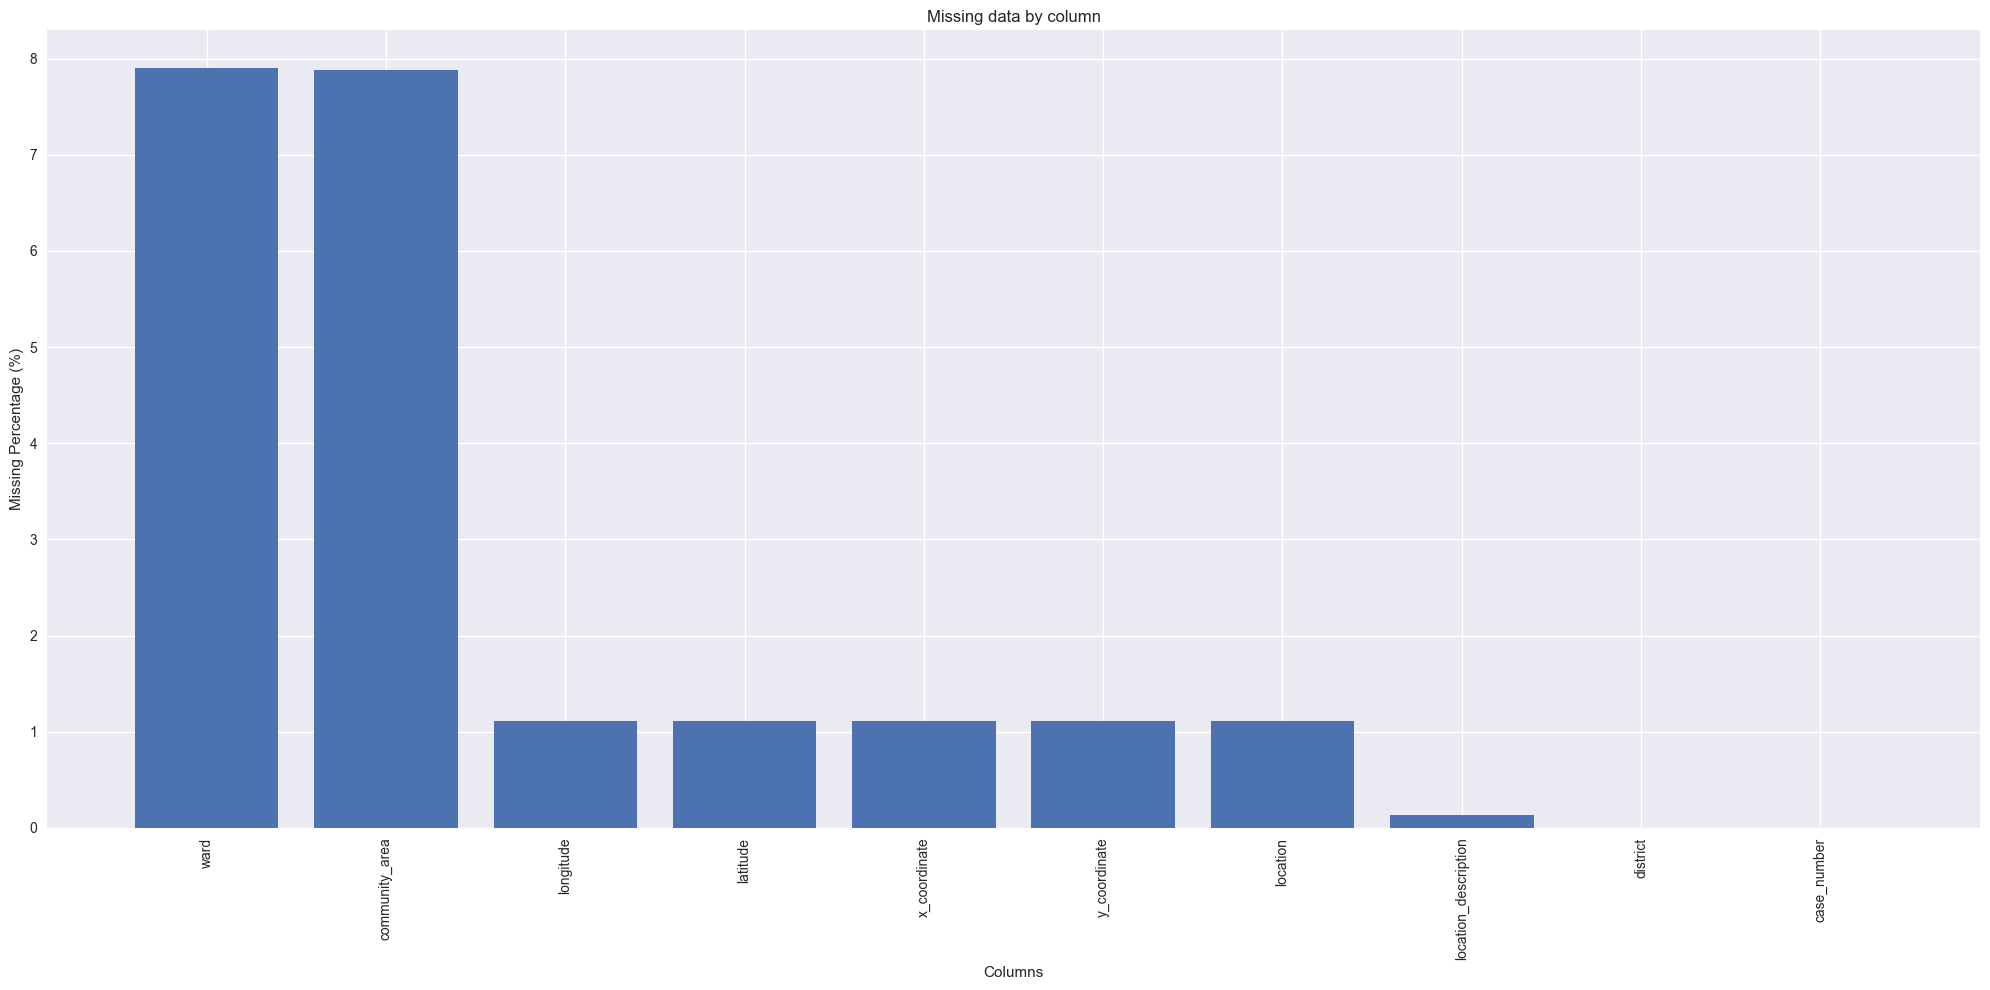

In [57]:
# Defining a function to analyze the mssing data
def missing_data_analysis(crime_dataset):
    """Analyzing missing data in the dataset"""

    missing_data = pd.DataFrame({
            'Columns': crime_dataset.columns,
            'Missing_count': crime_dataset.isnull().sum(),
            'Missing_percentage': (crime_dataset.isnull().sum()/ len(crime_dataset) * 100),
            'Data_type': crime_dataset.dtypes
    })

    missing_data = missing_data[missing_data['Missing_count'] > 0]. sort_values('Missing_percentage', ascending=False)

    print('_____________________\n')
    print('Missing DATA ANALYSIS')
    print('_____________________')

    print(missing_data)
    # Visualizing missing data
    plt.figure(figsize=(20,10))
    plt.bar(missing_data['Columns'], missing_data['Missing_percentage'])
    plt.title('Missing data by column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

missing_data_analysis(crime_dataset)

In [59]:
# Checking for the missing values in the case_number feature
crime_dataset[crime_dataset['case_number'].isnull()== True]


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
4981841,7049552,<NA>,2009-07-30 03:00:00,058XX N PAULINA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2012,20,40,77,14,1164170.0,1938694.0,2009.0,2018-02-28 15:56:25,41.987400,-87.671539,"(41.987401038, -87.671539153)"
5286601,7610078,<NA>,2010-07-16 14:56:00,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,111,1,2,28,08B,1172646.0,1898435.0,2010.0,2018-02-10 15:50:01,41.876743,-87.641556,"(41.876744768, -87.641559043)"
5992794,8475075,<NA>,2012-02-08 22:00:00,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1731,17,31,16,05,NaN,NaN,2012.0,2016-05-04 15:48:23,NaN,NaN,<NA>
7488610,7014449,<NA>,2009-07-10 11:00:00,082XX S HARPER AVE,0560,ASSAULT,SIMPLE,STREET,False,False,411,4,8,45,08A,1187910.0,1850555.0,2009.0,2018-02-28 15:56:25,41.745007,-87.587044,"(41.74500765, -87.587041972)"


In [ ]:
assert(len(crime_dataset) != crime_dataset['case_number'].nunique())

In [18]:
# Dropping the missing values
crime_dataset.dropna(inplace=True)
crime_dataset.isnull().sum()

id                      0
case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
location                0
dtype: int64

In [19]:
# Checking the dataset for duplicated values
duplicated = crime_dataset.duplicated().sum()
print("Duplicated values:", duplicated)

Duplicated values: 0


# Exploratory Data Analysis

In [20]:
# Convert the year column to Integer
crime_dataset['year'] = crime_dataset['year'].astype('Int64')

# Checking the number of years in the dataset
crime_dataset_years_no = crime_dataset['year'].nunique()
print(f"Chicago crime dataset for {crime_dataset_years_no} years\n")

# Checking the years in the dataset
crime_dataset_years = crime_dataset['year'].unique()
print(f"The years in the dataset are\n{crime_dataset_years}")

Chicago crime dataset for 23 years

The years in the dataset are
<IntegerArray>
[2015, 2014, 2020, 2019, 2021, 2012, 2011, 2013, 2010, 2017, 2018, 2016, 2008, 2007, 2009, 2023, 2022, 2006, 2005, 2002, 2001, 2003, 2004]
Length: 23, dtype: Int64


In [21]:
# Checking the size of the dataset
crime_dataset.shape

(7084435, 22)

In [22]:
# Checking the data type
crime_dataset.info

<bound method DataFrame.info of                id case_number                    date                block  iucr        primary_type                    description             location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate  year              updated_on   latitude  longitude                       location
0        10224738    HY411648  09/05/2015 01:30:00 PM      043XX S WOOD ST  0486             BATTERY        DOMESTIC BATTERY SIMPLE                        RESIDENCE   False      True   924         9    12              61      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.669998  (41.815117282, -87.669999562)
1        10224739    HY411615  09/04/2015 11:30:00 AM  008XX N CENTRAL AVE  0870               THEFT                 POCKET-PICKING                          CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 P

# Descriptive Data Analysis

In [23]:
# Checking the Statistical summary of the data
# fetching numeric columns only

crime_data_numeric = crime_dataset.select_dtypes(include=['number']).columns
crime_data_numeric_summary = crime_dataset[crime_data_numeric].describe()
print("\nSummary Statistics:\n", crime_data_numeric_summary)



Summary Statistics:
                    id         beat   district       ward  community_area  x_coordinate  y_coordinate         year      latitude     longitude
count       7084435.0    7084435.0  7084435.0  7084435.0       7084435.0  7.084435e+06  7.084435e+06    7084435.0  7.084435e+06  7.084435e+06
mean   7464089.904572  1181.910362  11.283709  22.738391       37.498322  1.164604e+06  1.885658e+06  2010.672432  4.184184e+01 -8.767149e+01
std    3260656.450528    702.33163   6.946803  13.845493       21.529252  1.687794e+04  3.231425e+04     5.940239  8.890412e-02  6.119128e-02
min             634.0        111.0        1.0        1.0             0.0  0.000000e+00  0.000000e+00       2001.0  3.661945e+01 -9.168657e+01
25%         4568943.0        621.0        6.0       10.0            23.0  1.152953e+06  1.858900e+06       2006.0  4.176824e+01 -8.771378e+01
50%         7480168.0       1034.0       10.0       23.0            32.0  1.166122e+06  1.890656e+06       2010.0  4.185576e+0

In [24]:
# Extracting the year, month, week, day, hour, quarter and weekends from the dataset 
crime_dataset['date'] = pd.to_datetime(crime_dataset['date'])
crime_dataset['year'] = crime_dataset['date'].dt.year
crime_dataset['month'] = crime_dataset['date'].dt.month
crime_dataset['day'] = crime_dataset['date'].dt.day
crime_dataset['hour'] = crime_dataset['date'].dt.hour
crime_dataset['day_of_week'] = crime_dataset['date'].dt.day_of_week
crime_dataset['day_name'] = crime_dataset['date'].dt.day_name()
crime_dataset['month_name'] = crime_dataset['date'].dt.month_name()
crime_dataset['quarter'] = crime_dataset['date'].dt.quarter
crime_dataset['weekend'] = crime_dataset['day_of_week'].isin([5,6]) #Saturday and Sunday

# Time periods
crime_dataset['time_period'] = pd.cut(crime_dataset['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'],include_lowest=True)

# Applying the new date features to the dataset
print('Date extracted successfully - New columns added\n')
crime_dataset.head()

Date extracted successfully - New columns added



,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day,hour,day_of_week,day_name,month_name,quarter,weekend,time_period
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.669998,"(41.815117282, -87.669999562)",9,5,13,5,Saturday,September,3,True,Afternoon
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895081,-87.765404,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False,Morning
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937405,-87.716652,"(41.937405765, -87.716649687)",9,5,12,5,Saturday,September,3,True,Morning
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881905,-87.755119,"(41.881903443, -87.755121152)",9,5,13,5,Saturday,September,3,True,Afternoon
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6,21,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744377,-87.658432,"(41.744378879, -87.658430635)",9,5,10,5,Saturday,September,3,True,Morning


In [25]:
# Checking the columns in the dataset
crime_dataset.columns # check the output for the new added date features

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location', 'month', 'day', 'hour', 'day_of_week', 'day_name', 'month_name', 'quarter', 'weekend', 'time_period'], dtype='object')

# Certain Crimes in the last ten Years

In [26]:
# Subsetting the crime for the last ten years
crime_dataset_ten_yrs = crime_dataset[crime_dataset['year'] >= 2013]
crime_dataset_ten_yrs.tail(1000)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day,hour,day_of_week,day_name,month_name,quarter,weekend,time_period
7783640,12746978,JF299906,2022-06-30 12:40:00,012XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,LIBRARY,False,False,2033,20,46,3,26,1167282.0,1932906.0,2022,01/03/2023 03:46:28 PM,41.971451,-87.660263,"(41.971452044, -87.660260415)",6,30,12,3,Thursday,June,2,False,Morning
7783641,12751810,JF306301,2022-07-05 14:18:00,055XX S AUSTIN AVE,0810,THEFT,OVER $500,STREET,False,False,811,8,13,56,06,1137317.0,1867128.0,2022,01/03/2023 03:46:28 PM,41.791542,-87.772026,"(41.791541614, -87.772028588)",7,5,14,1,Tuesday,July,3,False,Afternoon
7783642,12742831,JF295440,2022-06-27 02:06:00,022XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,132,1,3,33,08B,1177561.0,1889490.0,2022,01/03/2023 03:46:28 PM,41.852089,-87.623787,"(41.852089006, -87.623784345)",6,27,2,0,Monday,June,2,False,Night
7783643,12740904,JF292906,2022-06-24 20:26:00,063XX S WOOD ST,3710,INTERFERENCE WITH PUBLIC OFFICER,RESIST / OBSTRUCT / DISARM OFFICER,STREET,True,False,725,7,15,67,24,1165431.0,1862554.0,2022,01/03/2023 03:46:28 PM,41.778439,-87.669067,"(41.778440025, -87.669068807)",6,24,20,4,Friday,June,2,False,Evening
7783644,12745770,JF298936,2022-06-23 12:00:00,015XX W WELLINGTON AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,1932,19,32,6,11,1165599.0,1920000.0,2022,01/03/2023 03:46:28 PM,41.936073,-87.666817,"(41.936073524, -87.666818076)",6,23,12,3,Thursday,June,2,False,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,12847575,JF420478,2022-09-01 05:00:00,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19,44,6,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934303,-87.641487,"(41.934304581, -87.641484982)",9,1,5,3,Thursday,September,3,False,Night
7784660,12847801,JF420319,2022-07-08 00:00:00,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5,9,49,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685543,-87.616814,"(41.685543881, -87.616812541)",7,8,0,4,Friday,July,3,False,Night
7784661,12847324,JF420102,2022-09-27 11:00:00,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3,5,43,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768066,-87.567451,"(41.768068052, -87.567452932)",9,27,11,1,Tuesday,September,3,False,Morning
7784662,12847570,JF420427,2022-09-03 10:25:00,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16,45,11,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973392,-87.758537,"(41.973391184, -87.758534512)",9,3,10,5,Saturday,September,3,True,Morning


In [27]:
# Checking the number of crimes rate in the last ten years
crime_ten_yrs = crime_dataset_ten_yrs['primary_type'].nunique()
print(f"There were {crime_ten_yrs} crimes recorded in the last ten years\n")

# Checking the type of crimes rate in the last ten years
type_crime_ten_yrs = crime_dataset_ten_yrs['primary_type'].unique()
print(f"The types of crimes in the last ten years:\n {type_crime_ten_yrs}")

There were 35 crimes recorded in the last ten years

The types of crimes in the last ten years:
 ['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', ..., 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (36, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']


In [28]:
# Checking the crimes in the last ten years
ten_yrs_crimes = crime_dataset_ten_yrs['primary_type'].value_counts()
ten_yrs_crimes

primary_type
THEFT                                587482
BATTERY                              485255
CRIMINAL DAMAGE                      286193
ASSAULT                              196105
OTHER OFFENSE                        164922
DECEPTIVE PRACTICE                   160327
NARCOTICS                            154056
MOTOR VEHICLE THEFT                  124539
BURGLARY                             119081
ROBBERY                              100081
CRIMINAL TRESPASS                     62006
WEAPONS VIOLATION                     58174
OFFENSE INVOLVING CHILDREN            21703
PUBLIC PEACE VIOLATION                17232
SEX OFFENSE                           10451
INTERFERENCE WITH PUBLIC OFFICER      10397
CRIM SEXUAL ASSAULT                    8824
PROSTITUTION                           8270
HOMICIDE                               6421
CRIMINAL SEXUAL ASSAULT                5599
ARSON                                  4577
LIQUOR LAW VIOLATION                   2643
STALKING           

`Data Visualization for all the Crimes recorded in the last ten years`

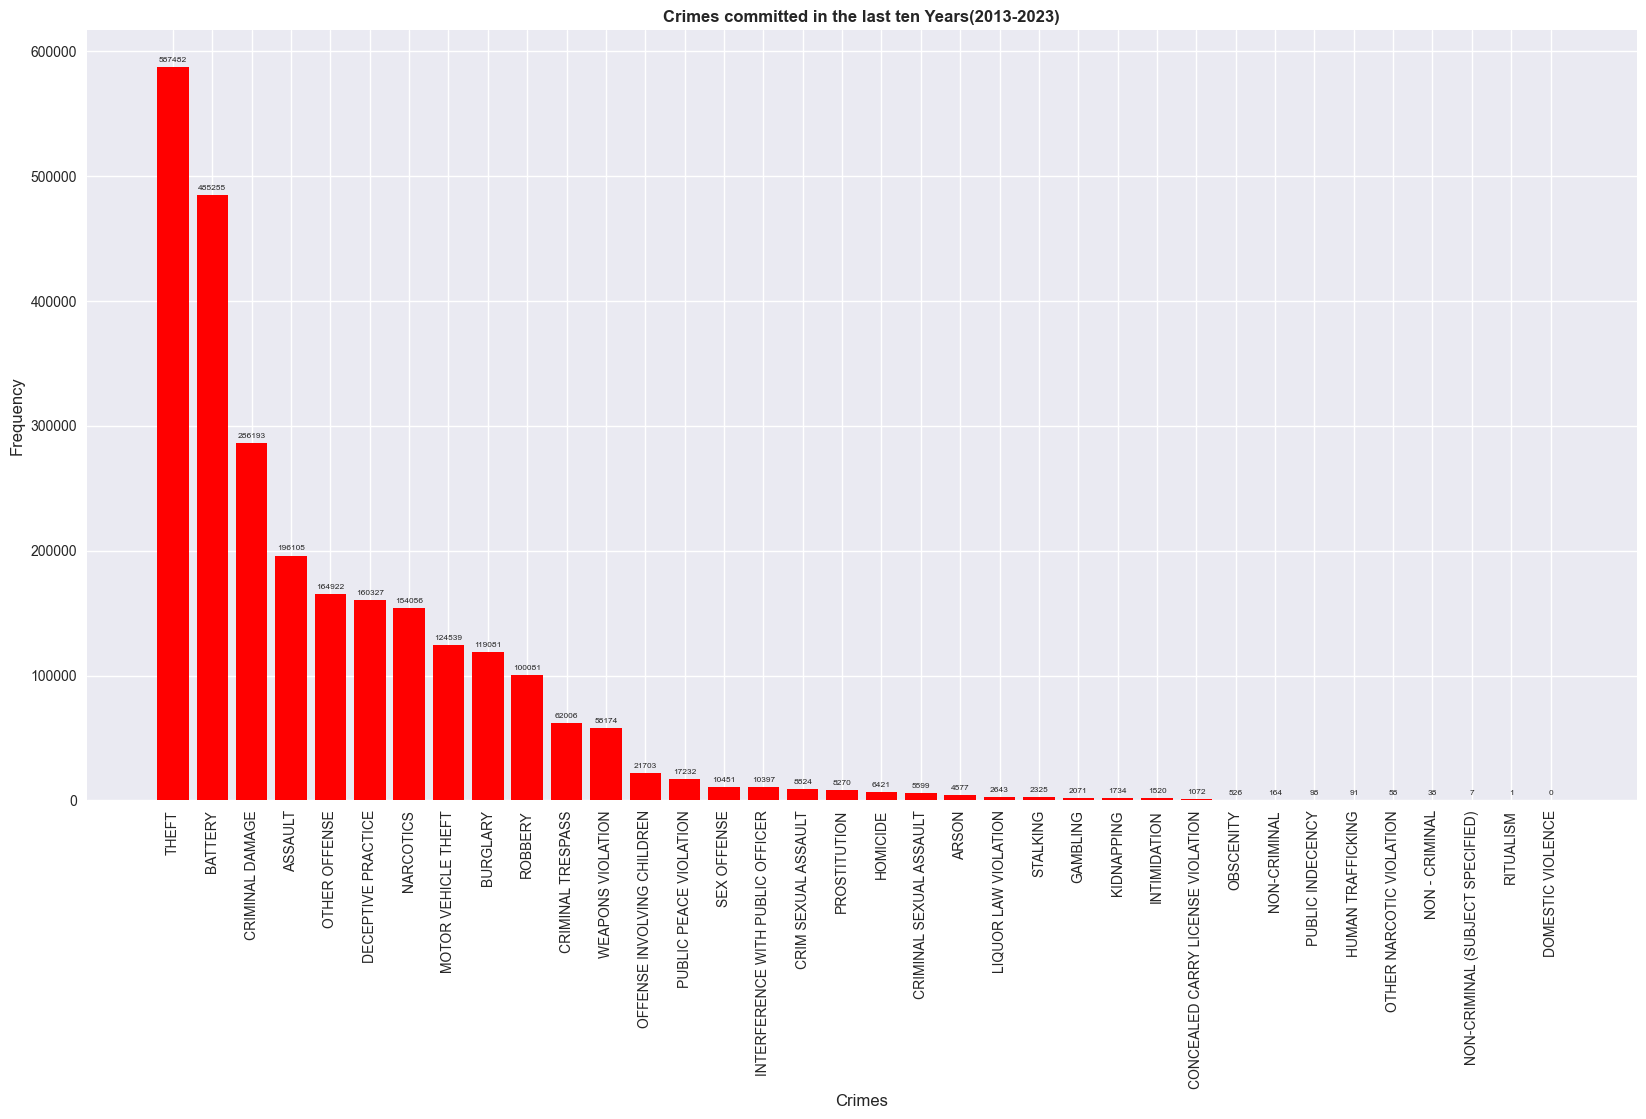

In [48]:
# # Plotting a barchart for the crimes committed in the last ten years
plt.figure(figsize=(20,10))
bars = plt.bar(ten_yrs_crimes.index, ten_yrs_crimes.values, color='red')
plt.xlabel('Crimes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Crimes committed in the last ten Years(2013-2023)", weight='bold')
plt.xticks(rotation=90)
plt.bar_label(bars, fmt='%.0f', padding=3, fontsize=6)
plt.show()

# Top ten crimes in the last ten years

In [30]:
# Top ten crimes in the last ten years
top_ten_crimes = crime_dataset_ten_yrs['primary_type'].value_counts().sort_values(ascending=False).head(10)
print(f"Top ten crimes in the last ten years:\n{top_ten_crimes}")

Top ten crimes in the last ten years:
primary_type
THEFT                  587482
BATTERY                485255
CRIMINAL DAMAGE        286193
ASSAULT                196105
OTHER OFFENSE          164922
DECEPTIVE PRACTICE     160327
NARCOTICS              154056
MOTOR VEHICLE THEFT    124539
BURGLARY               119081
ROBBERY                100081
Name: count, dtype: int64


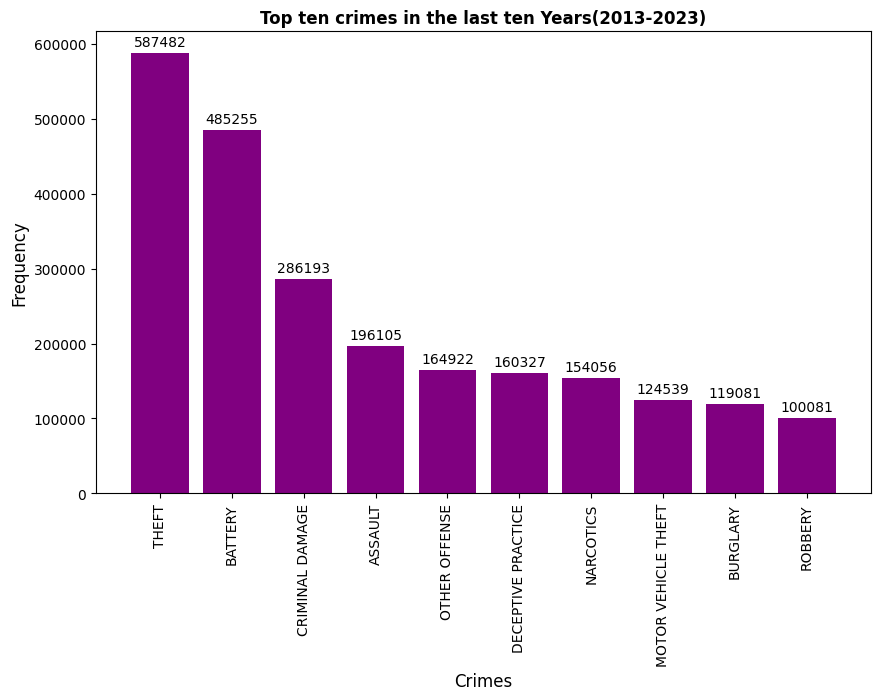

In [31]:
# Plotting a barchart for the crimes committed in the last ten years
plt.figure(figsize=(10,6))
bars = plt.bar(top_ten_crimes.index, top_ten_crimes.values, color='purple')
plt.xlabel('Crimes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Top ten crimes in the last ten Years(2013-2023)", weight='bold')
plt.xticks(rotation=90)
plt.bar_label(bars, fmt='%.0f', padding=3, fontsize=10)
plt.show()

**THEFT (2013-2023)**

In [32]:
# Selecting the theft in the last ten years
theft = top_ten_crimes.loc['THEFT']
print(f"Total theft (2013-2023): {theft}\n")

# Checking the theft in the last ten years
theft_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='THEFT'].value_counts(ascending=True)
print(f"Theft recorded from 2013-2023\n {theft_ten_yrs}\n")

# Grouping the theft by year
theft_grouped_by_10years = theft_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Theft by Year:\n",theft_grouped_by_10years)

Total theft (2013-2023): 587482

Theft recorded from 2013-2023
 id        case_number  date                 block                  iucr  primary_type  description     location_description          arrest  domestic  beat  district  ward  community_area  fbi_code  x_coordinate  y_coordinate  year  updated_on              latitude   longitude   location                       month  day  hour  day_of_week  day_name  month_name  quarter  weekend  time_period
8950859   HW100134     2013-01-01 01:24:00  030XX N NASHVILLE AVE  0810  THEFT         OVER $500       STREET                        False   False     2511  25        36    19              06        1131901.0     1919587.0     2013  02/10/2018 03:50:01 PM  41.935593  -87.790672  (41.935592333, -87.790672575)  1      1    1     1            Tuesday   January     1        False    Night          1
8950929   HW100192     2013-01-01 02:39:00  021XX N MILWAUKEE AVE  0870  THEFT         POCKET-PICKING  MOVIE HOUSE/THEATER           False   Fa

**BATTERY (2013-2023)**

In [33]:
# Checking the Battery in the last ten years
battery = top_ten_crimes.loc['BATTERY']
print(f"Total BATTERY crime recorded: {battery}\n")# 

# Checking the battery in the last ten years
battery_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='BATTERY'].value_counts(ascending=True)
print(f"Battery recorded from 2013-2023\n {battery_ten_yrs}\n")

# Grouping the Battery by Year
battery_grouped_by_10years = battery_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Battery by Year:\n",battery_grouped_by_10years)

Total BATTERY crime recorded: 485255

Battery recorded from 2013-2023
 id        case_number  date                 block                     iucr  primary_type  description                                                 location_description                    arrest  domestic  beat  district  ward  community_area  fbi_code  x_coordinate  y_coordinate  year  updated_on              latitude   longitude   location                       month  day  hour  day_of_week  day_name  month_name  quarter  weekend  time_period
8950860   HW100047     2013-01-01 00:40:00  011XX W LAWRENCE AVE      0460  BATTERY       SIMPLE                                                      SIDEWALK                                True    False     2033  20        46    3               08B       1167886.0     1932034.0     2013  02/10/2018 03:50:01 PM  41.969048  -87.658066  (41.969046206, -87.658064717)  1      1    0     1            Tuesday   January     1        False    Night          1
8950861   HW100044    

**CRIMINAL DAMAGE (2013-2023)**

In [34]:
# Checking the criminal_damagein the last ten years
criminal_damage = top_ten_crimes.loc['CRIMINAL DAMAGE']
print(f"Total Criminal damage recorded: {criminal_damage}\n")

# Checking the criminal_damage in the last ten years
criminal_damage_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='CRIMINAL DAMAGE'].value_counts(ascending=True)
print(f"Criminal damage recorded from 2013-2023\n {criminal_damage_ten_yrs}\n")

# Grouping the criminal_damage by Year
criminal_damage_grouped_by_10years = criminal_damage_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Criminal damage by Year:\n",criminal_damage_grouped_by_10years)

Total Criminal damage recorded: 286193

Criminal damage recorded from 2013-2023
 id        case_number  date                 block                   iucr  primary_type     description  location_description                       arrest  domestic  beat  district  ward  community_area  fbi_code  x_coordinate  y_coordinate  year  updated_on              latitude   longitude   location                       month  day  hour  day_of_week  day_name  month_name  quarter  weekend  time_period
8950831   HW100016     2013-01-01 00:00:00  050XX S JUSTINE ST      1310  CRIMINAL DAMAGE  TO PROPERTY  RESIDENCE                                  False   False     933   9         16    61              14        1166857.0     1871304.0     2013  02/10/2018 03:50:01 PM  41.802422  -87.663589  (41.802420738, -87.663591109)  1      1    0     1            Tuesday   January     1        False    Night          1
8950835   HW100081     2013-01-01 01:04:00  049XX S PRINCETON AVE   1310  CRIMINAL DAMAGE  TO PROP

**ASSAULT (2013-2023)**

In [35]:
# Checking the Assault in the last ten years
assault = top_ten_crimes.loc['ASSAULT']
print(f"Total Assault recorded: {assault}\n")

# Checking the Assault in the last ten years
assault_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='ASSAULT'].value_counts(ascending=True)
print(f"Assault recorded from 2013-2023\n {assault_ten_yrs}\n")

# Grouping the Assault by Year
assault_grouped_by_10years = assault_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Assault by Year:\n",assault_grouped_by_10years)

Total Assault recorded: 196105

Assault recorded from 2013-2023
 id        case_number  date                 block                   iucr  primary_type  description                                                 location_description                    arrest  domestic  beat  district  ward  community_area  fbi_code  x_coordinate  y_coordinate  year  updated_on              latitude   longitude   location                       month  day  hour  day_of_week  day_name  month_name  quarter  weekend  time_period
8950844   HW100038     2013-01-01 00:20:00  054XX N SPAULDING AVE   0560  ASSAULT       SIMPLE                                                      APARTMENT                               True    True      1712  17        40    13              08A       1153402.0     1935930.0     2013  02/10/2018 03:50:01 PM  41.980038  -87.711220  (41.980037964, -87.711218268)  1      1    0     1            Tuesday   January     1        False    Night          1
8950846   HW100067     2013-01-0

**OTHER OFFENSE (2013-2023)**

In [36]:
# Checking the other offence in the last ten years
other_offence = top_ten_crimes.loc['ASSAULT']
print(f"Total other offences recorded: {other_offence}\n")

# Checking the other offence  in the last ten years
other_off_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='ASSAULT'].value_counts(ascending=True)
print(f"Other offence  recorded from 2013-2023\n {other_off_ten_yrs}\n")

other_off_grouped_by_10years = assault_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Other offence  by Year:\n", other_off_grouped_by_10years)

Total other offences recorded: 196105

Other offence  recorded from 2013-2023
 id        case_number  date                 block                   iucr  primary_type  description                                                 location_description                    arrest  domestic  beat  district  ward  community_area  fbi_code  x_coordinate  y_coordinate  year  updated_on              latitude   longitude   location                       month  day  hour  day_of_week  day_name  month_name  quarter  weekend  time_period
8950844   HW100038     2013-01-01 00:20:00  054XX N SPAULDING AVE   0560  ASSAULT       SIMPLE                                                      APARTMENT                               True    True      1712  17        40    13              08A       1153402.0     1935930.0     2013  02/10/2018 03:50:01 PM  41.980038  -87.711220  (41.980037964, -87.711218268)  1      1    0     1            Tuesday   January     1        False    Night          1
8950846   HW100067

**DECEPTIVE PRACTICE (2013-2023)**

In [37]:
# Checking the Deceptive Practice in the last ten years
decep_practice = top_ten_crimes.loc['ASSAULT']
print(f"Total Deceptive Practice recorded: {decep_practice }\n")

# Checking the other offence  in the last ten years
decep_practice_ten_yrs = crime_dataset_ten_yrs[crime_dataset_ten_yrs['primary_type']=='ASSAULT'].value_counts(ascending=True)
print(f"Deceptive Practice recorded from 2013-2023\n {decep_practice_ten_yrs}\n")

decep_practice_grouped_by_10years = assault_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Deceptive Practice  by Year:\n", decep_practice_grouped_by_10years)

Total Deceptive Practice recorded: 196105

Deceptive Practice recorded from 2013-2023
 id        case_number  date                 block                   iucr  primary_type  description                                                 location_description                    arrest  domestic  beat  district  ward  community_area  fbi_code  x_coordinate  y_coordinate  year  updated_on              latitude   longitude   location                       month  day  hour  day_of_week  day_name  month_name  quarter  weekend  time_period
8950844   HW100038     2013-01-01 00:20:00  054XX N SPAULDING AVE   0560  ASSAULT       SIMPLE                                                      APARTMENT                               True    True      1712  17        40    13              08A       1153402.0     1935930.0     2013  02/10/2018 03:50:01 PM  41.980038  -87.711220  (41.980037964, -87.711218268)  1      1    0     1            Tuesday   January     1        False    Night          1
8950846   

In [46]:
# Plotting all the top ten crimes recorded over the last ten years using matplolib
def create_crime_visualizations(crime_dataset_ten_yrs):
    
    """ create visualizations"""
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    fig.suptitle('Chicago Crime Data Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Theft recorded over ten years
    theft_grouped_by_10years.plot(kind='bar', ax=axes[0,0], color='red')
    axes[0,0].set_title('Theft over ten years')
    axes[0,0].set_xlabel('Theft by Year')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)

    # 2. Battery recorded over ten years
    battery_grouped_by_10years.plot(kind='barh', ax=axes[0,1], color='black')
    axes[0,1].set_title('Battery over ten years')
    axes[0,1].set_xlabel('Battery by Year')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Criminal damage recorded over ten years
    criminal_damage_grouped_by_10years.plot(kind='barh', ax=axes[0,2], color='orange')
    axes[0,2].set_title('Criminal damage over ten years')
    axes[0,2].set_xlabel('Criminal damage by Year')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Assault recorded over ten years
    assault_grouped_by_10years.plot(kind='barh', ax=axes[0,3], color='blue')
    axes[0,3].set_title('Assault damage over ten years')
    axes[0,3].set_xlabel('Assault damage by Year')
    axes[0,3].set_ylabel('Frequency')
    axes[0,3].grid(True, alpha=0.3)

    # 5. Othher Offence recorded over ten years
    other_off_grouped_by_10years.plot(kind='barh', ax=axes[0,4], color='green')
    axes[0,4].set_title('Other Offence over ten years')
    axes[0,4].set_xlabel('Other Offence by Year')
    axes[0,4].set_ylabel('Frequency')
    axes[0,4].grid(True, alpha=0.3)

    # 6. Deceptive Practice recorded over ten years
    decep_practice_grouped_by_10years.plot(kind='barh', ax=axes[1,0], color='maroon')
    axes[1,0].set_title('Deceptive Practice over ten years')
    axes[1,0].set_xlabel('Deceptive Practice by Year')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

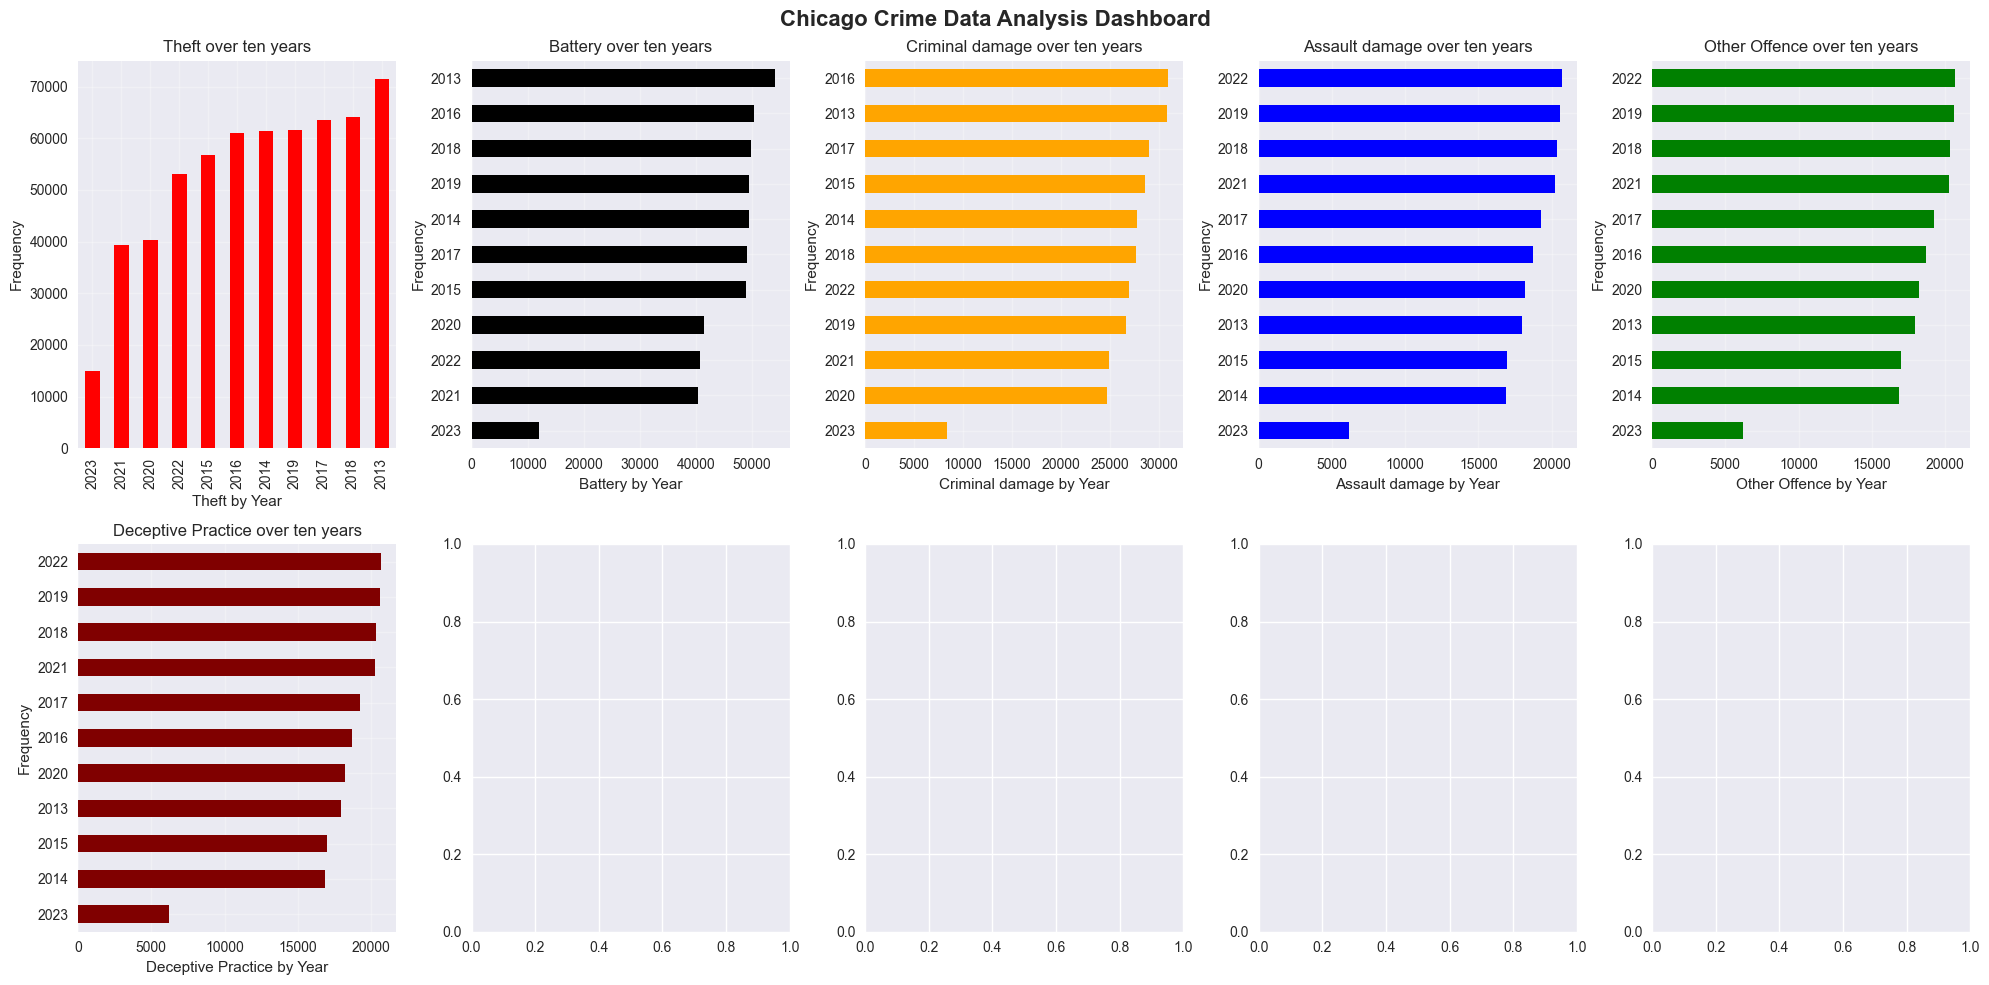

In [47]:
create_crime_visualizations(crime_dataset_ten_yrs)

In [40]:
t

NameError: name 't' is not defined

In [ ]:
# # Plotting the theft recorded over the last ten years using barchart in Pandas
# # theft_by_location.plot(kind='bar', xlabel='Year', ylabel='Frequency', title="Theft recorded in the last ten Years(2013-2023)", color='black')
# # Plotting a barchart for the crimes committed in the last ten years
# plt.figure(figsize=(10,6))
# plt.bar(theft_by_location.index, theft_by_location.values, color='red')
# plt.xlabel('Location')
# plt.ylabel('Year')
# plt.title("Theft recorded by location in the last ten Years(2013-2023)")
# plt.xticks(rotation=90)
# plt.show()